 Authors: Pedro Herruzo, Xiaoxia Lin             
 Date: 30/12/2016

--------------------------------------------------------------------------------------------------------------------


## Exercise 5:

Solve the two-dimensional problem

minimize $ (x - a)^2 + (x - b)^2 + xy $, 
subject to: $ 0 \leq x \leq 1; 0 \leq y \leq 1 $

for all possible values of the scalars a and b.

** Answer: ** 

We have 4 inequality constraints, we define the Lagrangian associated with
problem as:

$$
L(x,y,\mu) = ((x - a)^2 + (x - b)^2 + xy - u_1x - u_2y - u_3(1-x) - u_4(1-y) = 0
$$

According to the KKT, there exist $u_i$'s such that:  

\begin{align*}
       \frac{\delta L}{\delta x} =  2(x-a) + 2(x-b) + y - u_1 + u_3 & = 0\\
       \frac{\delta L}{\delta y} = x - u_2 + u_4 & = 0 \\
       u_1 x & = 0  \\
       u_2 y & = 0  \\
       u_3 (1 - x) & = 0 \\
       u_4 (1 - y) & = 0 \\
       0 \leq u_i, &  \forall i \in \{1,2,3,4\}
\end{align*}

Solving the above system using the online tool [wolfram](https://www.wolframalpha.com/) we get eight solutions:

<img src="system.png">

$ \textbf{Analysing the solutions:} $

Solution (6) is not feasible because $u_4$ can not be negative.
Solution (7) is not feasible because $x$ and $u_4$ have different signs, but they both must be positive. 

Solutions (2)(3)(4) can be consider as special cases of (1): $x = 0, y = 2a + 2b + u_1$, $u_2=u_3=u_4=0$ by vary the value of  $u_1$
+ Solution(2)($ x = 0, y =0$): $u_1 = -2(a+b)$, as $u_1 \geq 0$, we can conclude that $a+b \leq 0$
+ Solution(3)($ x = 0, y =1$): $u_1 = -2(a+b) + 1$, as $u_1 \geq 0$, we can conclude that $-2(a+b)+1\geq 0 \Leftrightarrow -2(a+b)\geq -1 \Leftrightarrow  a+b \leq \frac{1}{2}  $
+ Solution(4)($ x = 0, y = 2(a+b)$): as $0 \leq y \leq 1$, we can conclude that $ 0 \leq a+b \leq  \frac{1}{2}$, in this case $u_1=0$. 

Now only left solution (5) and (8):

+ Solution(8)($ x = \frac{a+b}{2}, y =0$): as $0 \leq x \leq 1$, we can conclude that $ 0 \leq a+b \leq  2$, which also satisfies the condition of $u_2=\frac{a+b}{2}\geq 0$.
+ Solution(5)($ x = 1, y =0$): as $u_3 \geq 0$, we can conclude that $a+b \geq 2$.

Below we present a plot where we played with values a and b to check if the solutions above were satisfied correctly. You can also play with these values.



In [1]:
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, y, a, b):
    return (x - a)**2 + (x - b)**2 + x*y

min_f:  0.98
posX:  8 posY:  0
x_min:  0.8 Y_min:  0.0 f:  0.98


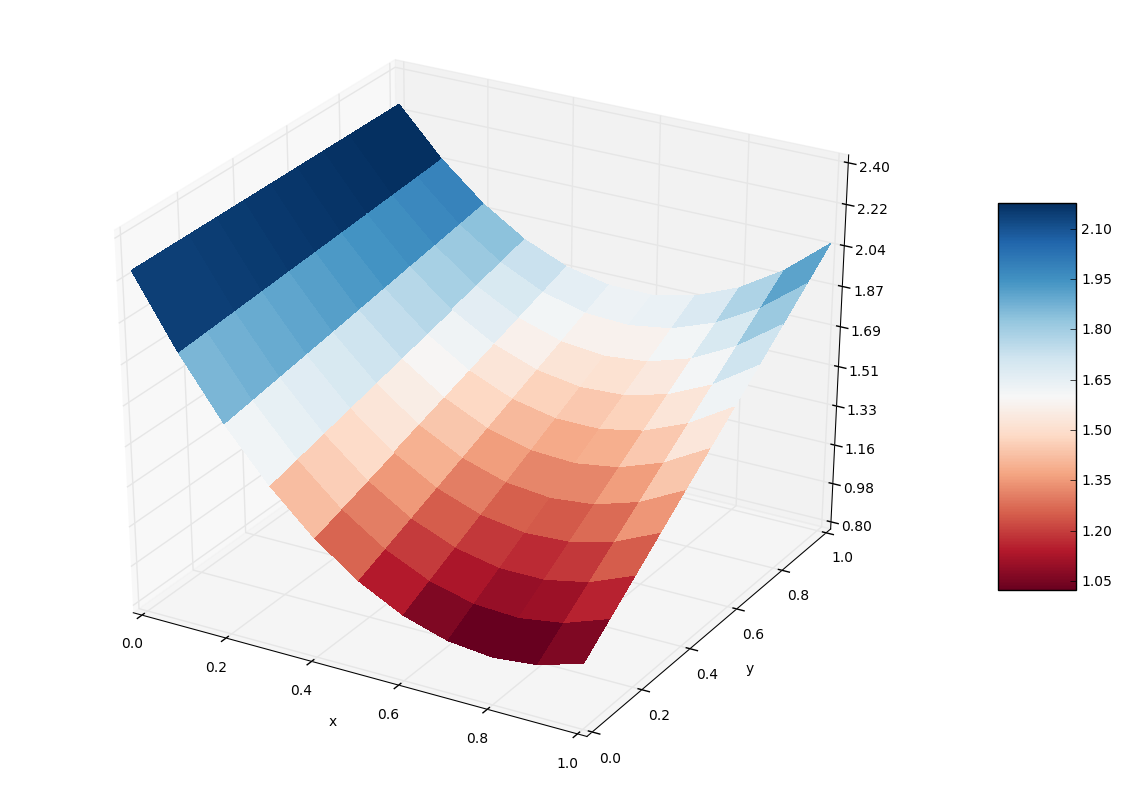

In [43]:
# Try to change the value of a and b

a = 0.1
b = 1.5

x = np.arange(0, 1.1,0.1)
y = np.arange(0, 1.1,0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, a, b)

fig = plt.figure(figsize=[15,10])
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('x')
plt.ylabel('y')
fig.colorbar(surf, shrink=0.5, aspect=5);
posX = np.argmin(Z)
posY = np.argmin(Z[:,posX])
print 'min_f: ', np.min(Z)
print 'posX: ', posX, 'posY: ', posY
print 'x_min: ', x[posX], 'Y_min: ', y[posY], 'f: ', f(x[posX],  y[posY], a, b)

## Exercise 6:

Given a vector y, consider the problem

$$ maximize~~ y^T x $$
$$ subject~~ to: ~~ x^TQx ≤ 1$$

where Q is a positive definite symmetric matrix. Show that the optimal value is $ \sqrt{y^TQ^{−1}y}$ and use this fact to establish the inequality

$$ (x^Ty)^2 ≤ (x^TQ x)(y^TQ^{−1}y)$$

** Answer: ** 

We have 1 inequality constraint, we define the Lagrangian associated with
problem as:

$$
L(x,y,\mu) = y^T x + \mu (1-x^TQx) = 0
$$

According to the KKT, there exist $\mu$ such that:  

\begin{align*}
       \frac{\delta L}{\delta x} = y^T -  2\mu x^T Q & = 0  ~~~~  (1) \\
       \mu (1-x^TQx) & = 0  ~~~~  (2) \\
       0 \leq & \mu
\end{align*}

From (1) and the fact that Q is a positive definite symmetric matrix,  $ x^{T} = \frac{1}{2\mu} y^TQ^{-1}$ for $\mu \neq 0$ (Note that, from (1), $\mu=0$ only if $y=0$). Substitute it into (2),  


\begin{align*}
        \mu (1-x^TQx) & = 0 \\
        1-x^TQx & = 0 \\
        1-\frac{1}{2\mu} y^TQ^{-1}Q\frac{1}{2\mu}(Q^{-1})^Ty & = 0 \\
        1-\frac{1}{(2\mu)^2} y^T(Q^{-1})^Ty & = 0 \\       
        1 & = \frac{1}{(2\mu)^2} y^T(Q^{-1})^Ty \\ 
        \mu^2 & = \frac{1}{2^2} y^TQ^{-1}y \\
        \mu & = \texttt{+}\frac{1}{2} \sqrt{y^TQ^{-1}y}  ~~~~  (3) \\
\end{align*}


Then, using (3), the optimal value is 

$$ y^T x  =  x^T y = \frac{1}{2\mu} y^TQ^{-1} y= \frac{1}{2\frac{1}{2} \sqrt{y^TQ^{-1}y}} y^TQ^{-1} y = \frac{1}{\sqrt{y^TQ^{-1}y}} y^TQ^{-1} y =  \sqrt{y^T Q^{-1} y} $$


Now let us see the inequality. From (2), the optimal point is reached at the boundary of our constraint, i.e, $x^TQx = 1$. Hence, for this point, the inequality becomes the trivial equality. Note that this solution is unique, thus, it remains to proof that when we are not in the boundary, i.e, $x^TQx < 1$, the square of our objective function is strictly upper bounded by $(x^TQ x)(y^TQ^{−1}y)$. Formally, we want to proof:
\begin{align*}
       \texttt{if } x\in{\{x^TQx < 1\}}\Longrightarrow  (x^Ty)^2<(x^TQ x)(y^TQ^{−1}y)
\end{align*}

The proof follows directly by an absurd discussing. Suppose that $(x^Ty)^2\geq (x^TQ x)(y^TQ^{−1}y)$, we know that the square of the maximum in our feasible space is $y^TQ^{−1}y$, and it is achieved by $x$ s.t $x^TQx = 1$, which is a contradiction $\Box$